<a href="https://colab.research.google.com/github/aureliolfdez/Visualizaci-n---AGs/blob/main/Actividad_Guiada_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nombre: Aurelio López Fernández

In [2]:
#Importamos modulos
import pandas as pd
import io
import requests
import seaborn as sns
import timeit
import matplotlib.pyplot as plt

In [3]:
#Cargamos el dataset de los pasajeros del Titanic
url="https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
s=requests.get(url).content
titanic=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [4]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [17]:
# Informacion del dataset
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   tarifa       891 non-null    float64
 7   embarked     889 non-null    object 
 8   clase        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
 15  is_old       891 non-null    bool   
 16  is_baby      891 non-null    bool   
 17  class_num    891 non-null    int64  
dtypes: bool(4), float64(2), int64(5), object(7)
memory

In [18]:
#Renombra la columna class=clase y fare=tarifa
titanic.rename(columns={'class': 'clase'},
inplace=True)
titanic.rename(columns={'fare': 'tarifa'},
inplace=True)
#Muestra los valores distintos para class(clase)
titanic.clase.unique()
#Primeras 5 filas
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old,is_baby,class_num
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,False,False,3
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,False,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,False,False,3
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,False,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,False,False,3


In [19]:
#Añadimos nuevas columnas: is_old, is_baby
###############################################
def is_old_func(row):
  return row['age'] > 60
titanic['is_old'] = titanic.apply(is_old_func, axis='columns')
#Otra forma de definir una nueva columna
titanic.eval ( ' is_baby = age< 15 ' , inplace = True)

In [20]:
#Define una variable numérica: class_num
def class_num_func(row):
  Clase={'Third':3,'First':1,'Second':2}
  return Clase[row.clase]
titanic['class_num'] = titanic.apply(class_num_func, axis='columns')

In [21]:
#Primeras 5 filas
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old,is_baby,class_num
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,False,False,3
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,False,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,False,False,3
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,False,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,False,False,3


In [22]:
#Consulta con condiciones
titanic[
(titanic.sex == 'female')
& (titanic['clase'].isin(['First', 'Third']))
& (titanic.age > 45 )
& (titanic.survived == 0)
]

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old,is_baby,class_num
132,0,3,female,47.0,1,0,14.5000,S,Third,woman,False,NaN,Southampton,no,False,False,False,3
177,0,1,female,50.0,0,0,28.7125,C,First,woman,False,C,Cherbourg,no,True,False,False,1
736,0,3,female,48.0,1,3,34.3750,S,Third,woman,False,NaN,Southampton,no,False,False,False,3


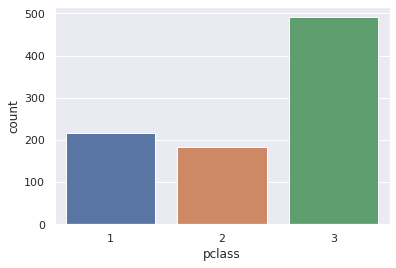

In [23]:
#Distribución de las clases
sns.countplot(x="pclass", data=titanic)

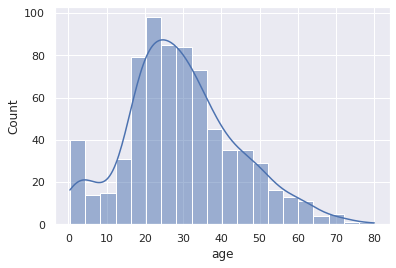

In [28]:
#Distribución de la edad(ege)
sns.histplot(titanic.age.dropna( ), kde=True)
plt.show( )

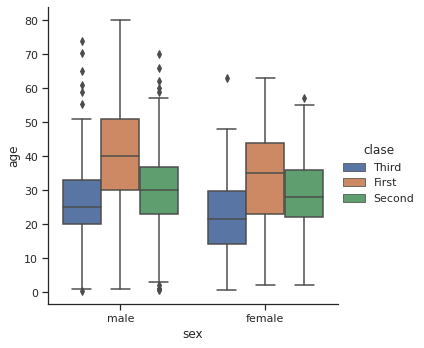

In [31]:
#BoxPlot de la edad por sexo y clase
with sns.axes_style(style='ticks'):
  ax = sns.catplot(data=titanic, x="sex", y="age", hue="clase", kind="box") 

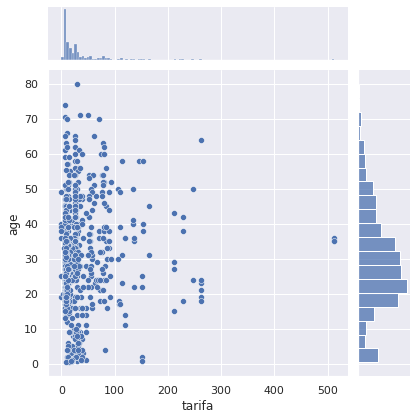

In [32]:
#Distribución cruzada de Edad y Tarifa
sns.jointplot(x='tarifa',y='age',data=titanic)

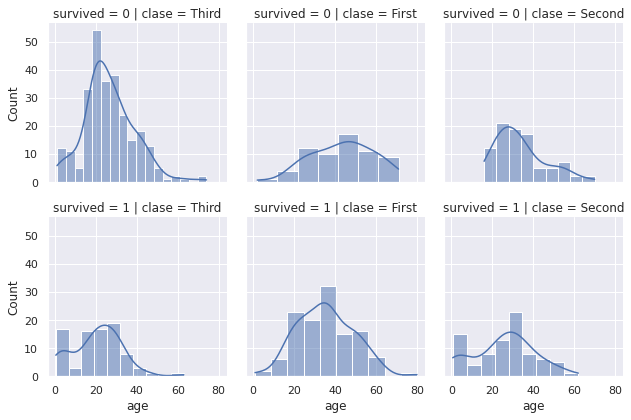

In [35]:
#Cambiamos el font
sns.set(font_scale=1)
#FacetGrid - Construir una matriz de gráficos
g = sns.FacetGrid(titanic, row='survived',col='clase')
g.map(sns.histplot, "age", kde=True)
plt.show()

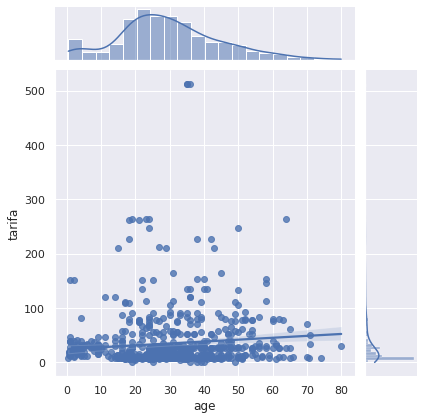

In [36]:
#Diagrama de dispersion con Distribucion de cada variable: fare(precio)/age(edad)
sns.jointplot(data=titanic, x='age', y='tarifa', kind='reg', color='b')
plt.show()

Text(0.5, 1.0, 'titanic.corr()')

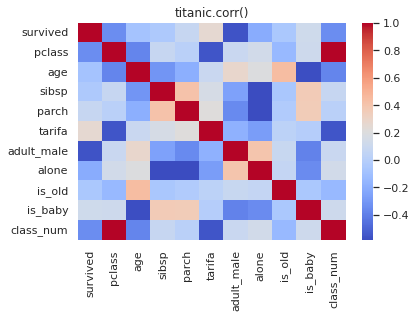

In [37]:
# Mapa de calor de correlaciones
tc = titanic.corr()
sns.heatmap(tc,cmap='coolwarm')
plt.title('titanic.corr()')

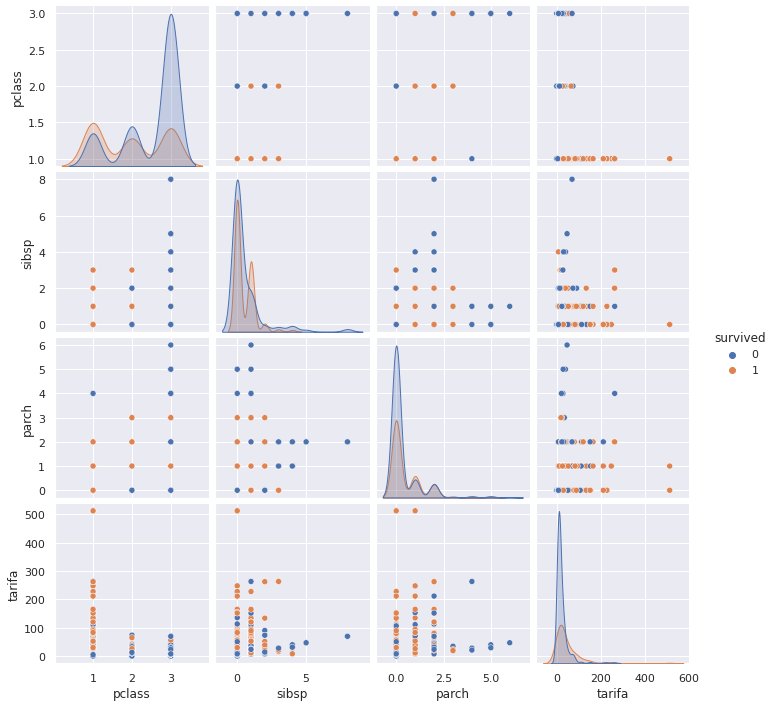

In [38]:
#Define un subconjuto de datos con las variables numéricas
titanic_num = titanic[['survived','pclass','sibsp','parch','tarifa']]
#Hace una matriz de diagramas de dispersión de parejas de variables.
sns.pairplot(titanic_num, hue="survived")
plt.show()

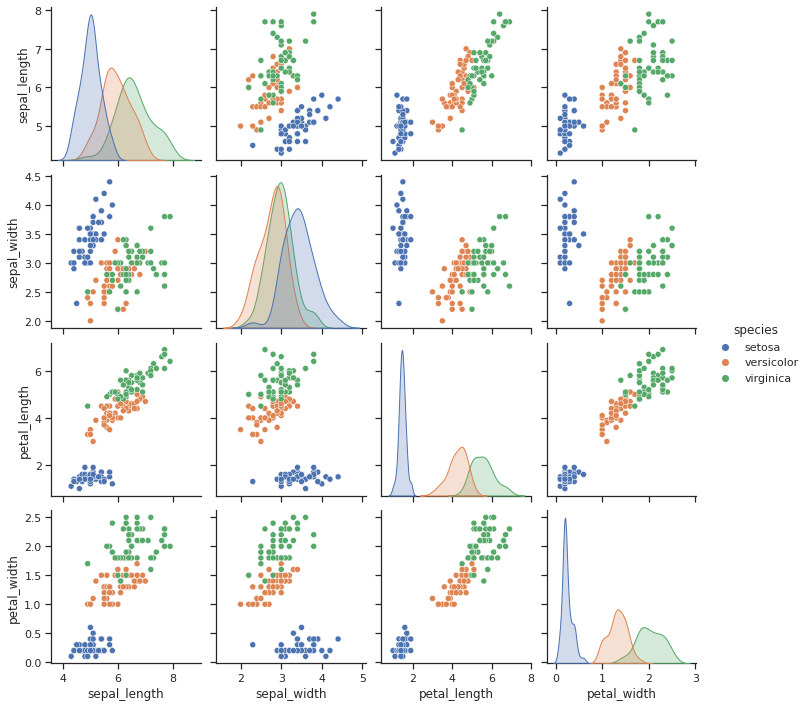

In [39]:
#DATASET IRIS
#Establece el estilo estético de las tramas
sns.set(style="ticks")
#Carga el data set
df = sns.load_dataset("iris")
#matriz de diagramas de dispersion
sns.pairplot(df, hue="species")